# Introduction
In this notebook, we continue with ODI performance of international batsman dataset.
In this we will be completing the following tasks:
### 1. Data Pre-processing
* Removing unnecessary features
* Feature Engineering
* Encoding categorical features
* Filling missing values

### 2. Model implementations
* Implementing supervised machine learning models
* Calculating Accuracy score, Precision score, F1-score and Recall score of the implemented models

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/cricket-player-performance/cricket_batsman.csv
/kaggle/input/batsman/cricket_batsman_information.csv
/kaggle/input/cricket-player-info/cricket_bowler_information.csv


In [2]:
dataset = pd.read_csv('/kaggle/input/batsman/cricket_batsman_information.csv')

#  Data Pre-processing

In [3]:
#renaming columns
dataset['Country']=dataset['Country_x']
dataset['OppositionTeam']=dataset['Opposition_x']
dataset['Day']=dataset['Day_x']
dataset['battingStyle']=dataset['battingStyle_x']

drop=['Country_x','Opposition_x','Day_x','battingStyle_x','Name_x']
dataset.drop(drop,axis=1,inplace=True)

In [4]:
#checking for missing values
dataset.isnull().sum()

Innings Player                   0
Ground                           0
Innings Runs Scored Buckets      0
Innings_Runs_Score               0
Innings_Batting_Strike_Rate      0
Year                             0
Month                            0
Batting_Average                  0
consistency                      6
Average_Career                   0
Strike_rate_Career               6
form                            78
Average_Yearly                   0
Strike_rate_Yearly              78
opposition                     240
Average_Opposition               0
Strike_rate_Opposition         240
venue                          658
Average_venue                    0
Strike_rate_venue              658
50s                              0
100s                             0
0s                               0
Innings_Balls_Faced              0
Innings_Number                   0
Country                          0
OppositionTeam                   0
Day                              0
battingStyle        

In [5]:
#battingStyle contains categorical values, so it is best to fill the missing values with mode
dataset['battingStyle'].fillna(dataset['battingStyle'].mode()[0], inplace=True)

#rest of the missing values are replaced by medians of the respective columns
def fmedian(df,col):
    median_value=df[col].median()
    df[col].fillna(median_value, inplace=True)
    
fmedian(dataset,'consistency')
fmedian(dataset,'Strike_rate_Career')
fmedian(dataset,'form')
fmedian(dataset,'Strike_rate_Yearly')
fmedian(dataset,'opposition')
fmedian(dataset,'Strike_rate_Opposition')
fmedian(dataset,'Strike_rate_venue')
fmedian(dataset,'venue')

In [6]:
#removing few variables as they depend on target variable and hence will affect our model
dataset.drop('Innings Runs Scored Buckets',axis=1,inplace=True)
dataset.drop('Batting_Average',axis=1,inplace=True)
dataset.drop('Innings_Batting_Strike_Rate', axis=1,inplace=True)

## Label Encoding 
Here, we are label encoding all the categorical variables using Label Encoder from sklearn library.

In [7]:
from sklearn.preprocessing import LabelEncoder

def encode(df,col):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

encode(dataset,'Innings Player')
encode(dataset,'Ground')
encode(dataset,'Country')
encode(dataset,'OppositionTeam')
encode(dataset,'Day')
encode(dataset,'battingStyle')

## Checking Correlation
We will be checking correlations between the variables to better understand the data.

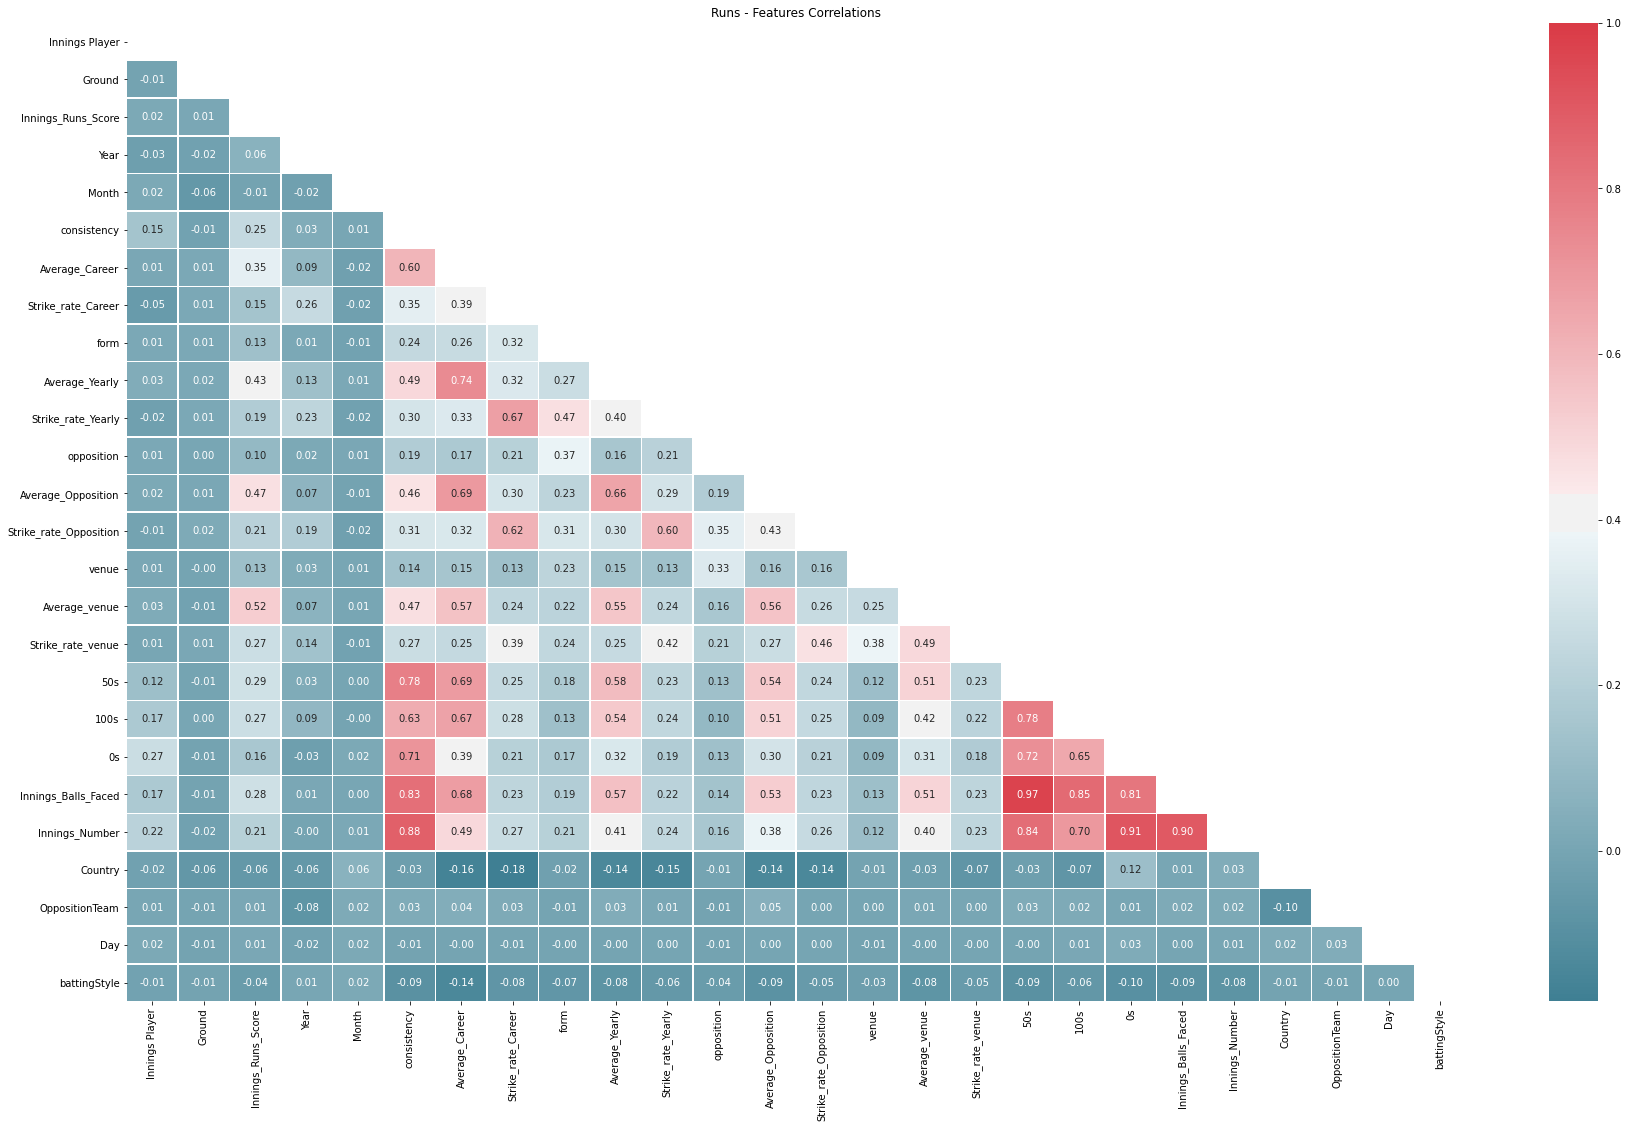

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(30, 18))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.title('Runs - Features Correlations')
plt.show()

In [9]:
target=dataset['Innings_Runs_Score']
train=dataset.drop('Innings_Runs_Score', axis=1)

In [10]:
target.value_counts()

1    59621
2    17246
3     8246
4     3395
5     2861
Name: Innings_Runs_Score, dtype: int64

## Class Imbalance
We observed that majority of the records fall within class 1 in batting. This
created a major imbalance in the distribution of values and affected the performance of the
learning algorithms. To solve this problem, we applied an oversampling technique Supervised
Minority Oversampling Technique (SMOTE) on minority classes to make all the classes
equally distributed. 

In [11]:
#applying SMOTE
from imblearn.combine  import SMOTETomek
smk=SMOTETomek(random_state=42)
train_new,target_new=smk.fit_sample(train,target)

In [12]:
#splitting dataset into 80% train and 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_new, target_new, test_size = 0.20, random_state = 0)

# Model Implementation
1. Naive Bayes
2. Decision Trees
3. Random Forest

## Naive Baye's

In [13]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
y_pred=nb_model.predict(X_test)

In [14]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy=accuracy_score(y_test,y_pred) 
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')

print('Accuracy - {}'.format(accuracy))
print('Precision - {}'.format(precision))
print('Recall - {}'.format(recall))
print('F1 - {}'.format(f1))

Accuracy - 0.45247920021470744
Precision - 0.4764849944855179
Recall - 0.45247920021470744
F1 - 0.4483189750415359


## Decision Trees

In [15]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini', splitter='best',
                             max_depth=16, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                             max_features=None, random_state=None,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             min_impurity_split=None, class_weight=None, 
                             presort='deprecated', ccp_alpha=0.0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [16]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy=accuracy_score(y_test,y_pred) 
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')

print('Accuracy - {}'.format(accuracy))
print('Precision - {}'.format(precision))
print('Recall - {}'.format(recall))
print('F1 - {}'.format(f1))

Accuracy - 0.7880099302200751
Precision - 0.7954045472430612
Recall - 0.7880099302200751
F1 - 0.7863860466507636


## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [18]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy=accuracy_score(y_test,y_pred) 
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')

print('Accuracy - {}'.format(accuracy))
print('Precision - {}'.format(precision))
print('Recall - {}'.format(recall))
print('F1 - {}'.format(f1))

Accuracy - 0.994934245840043
Precision - 0.994943534906445
Recall - 0.994934245840043
F1 - 0.9949305408043961


# Conclusion
With an accuracy of 0.99, Random Forest has been performing the best for our dataset while Naive Bayes has been performing the worst with an accuracy of 0.44.